<a href="https://colab.research.google.com/github/lohitha2004/netflix-clone/blob/main/Heart_Faliure_Clinical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset (1).csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [ ]:
X = X.drop(["creatinine_phosphokinase", "platelets"], axis=1)

In [ ]:
X


,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,0,20,1,1.9,130,1,0,4
1,55.0,0,0,38,0,1.1,136,1,0,6
2,65.0,0,0,20,0,1.3,129,1,1,7
3,50.0,1,0,20,0,1.9,137,1,0,7
4,65.0,1,1,20,0,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,1.1,143,1,1,270
295,55.0,0,0,38,0,1.2,139,0,0,271
296,45.0,0,1,60,0,0.8,138,0,0,278
297,45.0,0,0,38,0,1.4,140,1,1,280


In [ ]:
df.value_counts('DEATH_EVENT')

,count
DEATH_EVENT,
0,203
1,96


In [ ]:
df.shape

(299, 13)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
param_grid = {
      'n_estimators': [150, 200],
       'learning_rate': [0.05, 0.1],
       'max_depth': [3, 4, 5],
       'subsample': [0.8, 1.0],
       'colsample_bytree': [0.8, 1.0]
}
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=3,verbose=0)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [150, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8658536585365854
ROC AUC: 0.9315883402736467

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.83      0.93      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



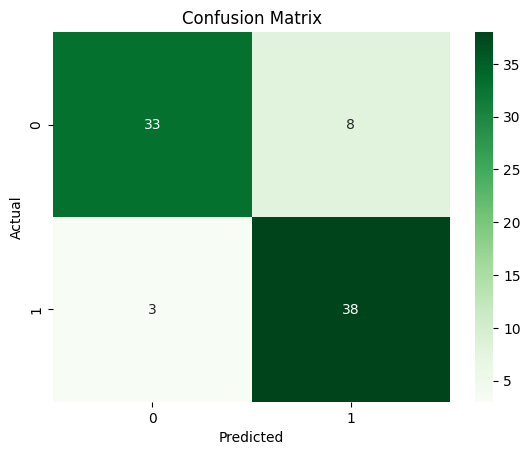

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

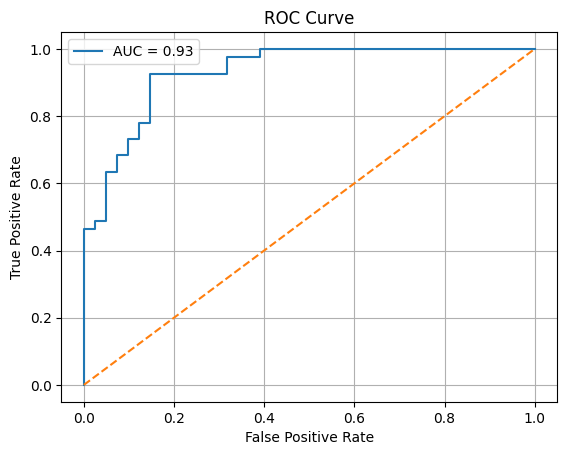

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=kfold,scoring='accuracy')
print(f"\n Stratified K-Fold Accuracy (mean):{cv_scores.mean():.4f}")
print(f"Accuracy Range: {cv_scores.min():.4f}-{cv_scores.max():.4f}")


 Stratified K-Fold Accuracy (mean):0.8843
Accuracy Range: 0.8395-0.9259


In [ ]:

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc * 100:.2f}%")

Model Accuracy: 86.59%


In [31]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(grid.best_estimator_, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)